# RNN for Arithmetic Sequence from Scratch

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Create the Dataset

In [2]:
# Generate Arithmetic Operations sequences with two patterns
arithmetic_sequences = []

for i in range(100):
    pattern_type = i % 2  # Define 2 types of patterns
    sequence = []
    if pattern_type == 0:  # Alternating differences (e.g., +5, -3, +5, -3)
        start = random.randint(500, 1000)
        diff1, diff2 = random.randint(1, 10), random.randint(-10, -1)
        sequence = [start]
        while len(sequence) < 100:
            next_value = sequence[-1] + (diff1 if len(sequence) % 2 == 1 else diff2)
            if next_value <= 0:
                next_value = random.randint(1, 100)  # Reset to positive if needed
            sequence.append(next_value)
    elif pattern_type == 1:  # Repeating fixed difference (e.g., +7, +7, +7, ...)
        start = random.randint(500, 1000)
        diff = random.randint(1, 20)
        sequence = [start]
        for _ in range(99):
            next_value = sequence[-1] + diff
            if next_value <= 0:
                next_value = random.randint(1, 100)  # Reset to positive if needed
            sequence.append(next_value)
    arithmetic_sequences.append(sequence)
    
# Create DataFrames
arithmetic_df = pd.DataFrame(arithmetic_sequences).add_prefix("arithmetic_sequences_")

# Save to CSV
arithmetic_df.to_csv("Patterned_Arithmetic_Sequences.csv", index=False)
print("Datasets saved as 'Patterned_Arithmetic_Sequences.csv'.")

Datasets saved as 'Patterned_Arithmetic_Sequences.csv'.


### Load the Dataset

In [3]:
arithmetic_sequences_file = "Patterned_Arithmetic_Sequences.csv"
arithmetic_df = pd.read_csv(arithmetic_sequences_file)
arithmetic_df.shape

(100, 100)

In [4]:
arithmetic_df.head(5)

,arithmetic_sequences_0,arithmetic_sequences_1,arithmetic_sequences_2,arithmetic_sequences_3,arithmetic_sequences_4,arithmetic_sequences_5,arithmetic_sequences_6,arithmetic_sequences_7,arithmetic_sequences_8,arithmetic_sequences_9,...,arithmetic_sequences_90,arithmetic_sequences_91,arithmetic_sequences_92,arithmetic_sequences_93,arithmetic_sequences_94,arithmetic_sequences_95,arithmetic_sequences_96,arithmetic_sequences_97,arithmetic_sequences_98,arithmetic_sequences_99
0,650,652,647,649,644,646,641,643,638,640,...,515,517,512,514,509,511,506,508,503,505
1,789,806,823,840,857,874,891,908,925,942,...,2319,2336,2353,2370,2387,2404,2421,2438,2455,2472
2,563,564,560,561,557,558,554,555,551,552,...,428,429,425,426,422,423,419,420,416,417
3,739,741,743,745,747,749,751,753,755,757,...,919,921,923,925,927,929,931,933,935,937
4,803,805,797,799,791,793,785,787,779,781,...,533,535,527,529,521,523,515,517,509,511


### Preprocess the Dataset

In [5]:
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize data column-wise
normalized_data = scaler.fit_transform(arithmetic_df)

# Convert back to a DataFrame for convenience
arithmetic_df_normalized = pd.DataFrame(normalized_data, columns=arithmetic_df.columns)

In [6]:
arithmetic_df_normalized.head(5)

,arithmetic_sequences_0,arithmetic_sequences_1,arithmetic_sequences_2,arithmetic_sequences_3,arithmetic_sequences_4,arithmetic_sequences_5,arithmetic_sequences_6,arithmetic_sequences_7,arithmetic_sequences_8,arithmetic_sequences_9,...,arithmetic_sequences_90,arithmetic_sequences_91,arithmetic_sequences_92,arithmetic_sequences_93,arithmetic_sequences_94,arithmetic_sequences_95,arithmetic_sequences_96,arithmetic_sequences_97,arithmetic_sequences_98,arithmetic_sequences_99
0,0.300,0.289683,0.268627,0.261628,0.241379,0.234848,0.231193,0.225045,0.223199,0.214041,...,0.094495,0.093431,0.094317,0.093275,0.094146,0.093124,0.093981,0.092978,0.093822,0.092838
1,0.578,0.595238,0.613725,0.631783,0.649425,0.666667,0.689908,0.705989,0.727592,0.731164,...,0.835661,0.835577,0.836356,0.836269,0.837025,0.836935,0.837670,0.837577,0.838291,0.838196
2,0.126,0.115079,0.098039,0.091085,0.074713,0.068182,0.071560,0.065336,0.070299,0.063356,...,0.058751,0.057528,0.059250,0.058046,0.059731,0.058546,0.060194,0.059028,0.060641,0.059492
3,0.478,0.466270,0.456863,0.447674,0.438697,0.429924,0.433028,0.424682,0.428822,0.414384,...,0.260477,0.258262,0.259976,0.257806,0.259494,0.257367,0.259029,0.256944,0.258581,0.256537
4,0.606,0.593254,0.562745,0.552326,0.522989,0.513258,0.495413,0.486388,0.471002,0.455479,...,0.101890,0.100775,0.100363,0.099279,0.098892,0.097839,0.097476,0.096451,0.096110,0.095112


In [7]:
inputs = np.array(arithmetic_df_normalized)
# Reshape the data for the RNN
inputs = np.expand_dims(np.array(arithmetic_df_normalized), axis=-1)  # Add a dimension for features
inputs.shape

(100, 100, 1)

## Arithemetic Sequence RNN Implementation

### Input Layer

In [8]:
class InputLayer:
    def __init__(self, inputs: np.ndarray, hidden_size: int) -> None:
        self.inputs = inputs  # Shape: [sequence_length, num_features, 1]
        self.U = np.random.randn(hidden_size, inputs.shape[1]) * np.sqrt(1 / inputs.shape[1])
        self.delta_U = np.zeros_like(self.U)

    def get_input(self, time_step: int) -> np.ndarray:
        return self.inputs[time_step].reshape(1, -1)  # Shape: [1, num_features]

    def weighted_sum(self, time_step: int) -> np.ndarray:
        return self.U @ self.get_input(time_step)

    def calculate_deltas_per_step(self, time_step: int, delta_weighted_sum: np.ndarray) -> None:
        self.delta_U += delta_weighted_sum @ self.get_input(time_step).T
        max_norm = 1.0
        grad_norm = np.linalg.norm(self.delta_U)
        if grad_norm > max_norm:
            self.delta_U *= max_norm / grad_norm

    def update_weights_and_bias(self, learning_rate: float) -> None:
        self.U -= learning_rate * self.delta_U
        self.delta_U = np.zeros_like(self.U)

### Hidden Layer

In [9]:
class HiddenLayer:
    def __init__(self, sequence_length: int, size: int, dropout_rate: float = 0.0) -> None:
        self.W = np.random.randn(size, size) * np.sqrt(1 / size)
        self.bias = np.zeros((size, 1))
        self.states = np.zeros((sequence_length, size, 1))
        self.delta_W = np.zeros_like(self.W)
        self.delta_bias = np.zeros_like(self.bias)
        self.dropout_rate = dropout_rate

    def get_state(self, time_step: int) -> np.ndarray:
        if time_step < 0:
            return np.zeros_like(self.states[0])
        return self.states[time_step]

    def set_state(self, time_step: int, state: np.ndarray) -> None:
        self.states[time_step] = state

    def activate(self, weighted_input: np.ndarray, time_step: int, training: bool = True) -> np.ndarray:
        previous_hidden_state = self.get_state(time_step - 1)
        activation = np.tanh(weighted_input + self.W @ previous_hidden_state + self.bias)

        if self.dropout_rate > 0 and training:
            dropout_mask = np.random.binomial(1, 1 - self.dropout_rate, activation.shape)
            activation *= dropout_mask

        self.set_state(time_step, activation)
        return activation

    def calculate_deltas_per_step(self, time_step: int, delta_output: np.ndarray) -> np.ndarray:
        delta_activation = delta_output
        delta_weighted_sum = delta_activation * (1 - self.get_state(time_step) ** 2)
        
        # Ensure proper shape for weight updates
        prev_hidden_state = self.get_state(time_step - 1).reshape(-1, 1)
        self.delta_W += delta_weighted_sum @ prev_hidden_state.T  # Update W with outer product
        self.delta_bias += delta_weighted_sum
        return self.W.T @ delta_weighted_sum

    def update_weights_and_bias(self, learning_rate: float) -> None:
        self.W -= learning_rate * self.delta_W
        self.bias -= learning_rate * self.delta_bias
        self.delta_W = np.zeros_like(self.W)
        self.delta_bias = np.zeros_like(self.bias)

### Output Layer

In [10]:
class OutputLayer:
    def __init__(self, size: int, hidden_size: int, sequence_length: int) -> None:
        # Weight initialization (Xavier initialization)
        self.V = np.random.randn(size, hidden_size) * np.sqrt(1 / hidden_size)
        self.bias = np.zeros((size, 1))
        self.states = np.zeros((sequence_length, size, 1))
        self.delta_V = np.zeros_like(self.V)
        self.delta_bias = np.zeros_like(self.bias)

    def get_state(self, time_step: int) -> np.ndarray:
        return self.states[time_step]

    def set_state(self, time_step: int, prediction: np.ndarray) -> None:
        self.states[time_step] = prediction

    def predict(self, hidden_state: np.ndarray, time_step: int) -> np.ndarray:
        # Linear activation (no softmax for regression)
        output = self.V @ hidden_state + self.bias
        self.set_state(time_step, output)  # Directly store linear output
        return output

    def calculate_deltas_per_step(
        self, expected: np.ndarray, hidden_state: np.ndarray, time_step: int
    ) -> np.ndarray:
        # Compute the delta for regression (MSE derivative)
        delta_output = 2 * (self.get_state(time_step) - expected) / expected.size

        # Accumulate gradients for weights and biases
        self.delta_V += delta_output @ hidden_state.T
        self.delta_bias += delta_output

        # Return the gradient with respect to the hidden state
        return self.V.T @ delta_output

    def update_weights_and_bias(self, learning_rate: float, clip_value: float = 5.0) -> None:
        # Gradient clipping to avoid exploding gradients
        grad_norm_V = np.linalg.norm(self.delta_V)
        grad_norm_bias = np.linalg.norm(self.delta_bias)

        if grad_norm_V > clip_value:
            self.delta_V *= clip_value / grad_norm_V

        if grad_norm_bias > clip_value:
            self.delta_bias *= clip_value / grad_norm_bias

        # Apply gradient descent
        self.V -= learning_rate * self.delta_V
        self.bias -= learning_rate * self.delta_bias

        # Reset gradients after the update
        self.delta_V = np.zeros_like(self.V)
        self.delta_bias = np.zeros_like(self.bias)

### Arithemetic Sequence RNN Workflow

In [11]:
from typing import List
import time

class ArithmeticSequenceRNN:
    def __init__(
        self,
        vocab_size: int,
        hidden_size: int,
        sequence_length: int,
        learning_rate: float,
        num_layers: int = 1,
        dropout_rate: float = 0.0,
    ):
        if num_layers <= 0:
            raise ValueError("Number of layers must be greater than 0.")

        self.input_layer = None  # Initialized later during training
        self.hidden_layers = [
            HiddenLayer(sequence_length=sequence_length, size=hidden_size, dropout_rate=dropout_rate)
            for _ in range(num_layers)
        ]
        self.output_layer = OutputLayer(size=vocab_size, hidden_size=hidden_size, sequence_length=sequence_length)
        self.learning_rate = learning_rate

    def feed_forward(self, inputs: np.ndarray, training: bool = True) -> OutputLayer:
        start_time = time.time()
        self.input_layer = InputLayer(inputs, hidden_size=self.hidden_layers[0].W.shape[0])
        
        for time_step in range(inputs.shape[0]):
            weighted_input = self.input_layer.weighted_sum(time_step)

            # Pass through hidden layers
            activation = self.hidden_layers[0].activate(weighted_input, time_step, training)
            for layer_idx in range(1, len(self.hidden_layers)):
                activation = self.hidden_layers[layer_idx].activate(activation, time_step, training)

            # Pass through output layer
            self.output_layer.predict(activation, time_step)
        #print(f"Feed Forward Time: {time.time() - start_time:.4f} seconds")
        return self.output_layer

    def backpropagation(self, expected: np.ndarray) -> None:
        for time_step in reversed(range(expected.shape[0])):
            # Backpropagation through output layer
            delta_output = self.output_layer.calculate_deltas_per_step(
                expected[time_step], self.hidden_layers[-1].get_state(time_step), time_step
            )

            # Backpropagate through hidden layers
            delta_hidden = delta_output
            for layer_idx in reversed(range(len(self.hidden_layers))):
                delta_hidden = self.hidden_layers[layer_idx].calculate_deltas_per_step(time_step, delta_hidden)

            # Backpropagation through input layer
            self.input_layer.calculate_deltas_per_step(time_step, delta_hidden)
        
        # Update all weights and biases
        self.output_layer.update_weights_and_bias(self.learning_rate)
        for hidden_layer in self.hidden_layers:
            hidden_layer.update_weights_and_bias(self.learning_rate)
        self.input_layer.update_weights_and_bias(self.learning_rate)

    def validate_input_shapes(self, inputs: np.ndarray, expected: np.ndarray) -> None:
        if len(inputs) != len(expected):
            raise ValueError("The number of input sequences must match the number of expected outputs.")

    def train(self, inputs: np.ndarray, expected: np.ndarray, epochs: int, validation_data=None) -> tuple:
        self.validate_input_shapes(inputs, expected)
        training_losses = []
        validation_losses = []

        batch_size = 10  # Adjust for efficiency
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            epoch_loss = 0

            for i in range(0, len(inputs), batch_size):
                batch_inputs = inputs[i:i + batch_size]
                batch_expected = expected[i:i + batch_size]

                for input_seq, expected_seq in zip(batch_inputs, batch_expected):
                    self.feed_forward(input_seq, training=True)
                    self.backpropagation(expected_seq)

                    # Print predictions after training
                    predictions = [self.output_layer.get_state(t) for t in range(input_seq.shape[0])]
                    #print(f"Predictions for input sequence {i}: {predictions}")

                    # Calculate loss for the sequence (MSE for regression)
                    loss = self.loss(predictions, expected_seq)
                    epoch_loss += loss

            avg_train_loss = epoch_loss / len(inputs)
            training_losses.append(avg_train_loss)
            print(f"Training Loss: {avg_train_loss}")

            if validation_data is not None:
                val_loss = self.evaluate(*validation_data)
                validation_losses.append(val_loss)
                print(f"Validation Loss: {val_loss}")

        return training_losses, validation_losses

    def evaluate(self, inputs: np.ndarray, expected: np.ndarray) -> float:
        self.validate_input_shapes(inputs, expected)
        total_loss = 0

        for sequence_idx, input_seq in enumerate(inputs):
            self.feed_forward(input_seq, training=False)
            predicted = [self.output_layer.get_state(t) for t in range(input_seq.shape[0])]
            total_loss += self.loss(predicted, expected[sequence_idx])

        return total_loss / len(inputs)

    @staticmethod
    def loss(predicted: List[np.ndarray], expected: List[np.ndarray]) -> float:
        # Mean Squared Error for regression
        return sum(np.mean((y_pred - y_true) ** 2) for y_pred, y_true in zip(predicted, expected)) / len(predicted)

### Split the Dataset

In [12]:
train_data, temp_data = train_test_split(inputs, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.66, random_state=42)

print(f"Training Data Shape: {train_data.shape}")
print(f"Validation Data Shape: {validation_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Training Data Shape: (70, 100, 1)
Validation Data Shape: (10, 100, 1)
Test Data Shape: (20, 100, 1)


### Grid Search to Find Best Model

In [13]:
from itertools import product

param_grid = {
    "hidden_size": [128, 256],
    "num_layers": [1, 2],
    "learning_rate": [0.0001, 0.001],
    "sequence_length": [6, 20, 50],
    "dropout_rate": [0.1, 0.2],
}

# Initialize variables to store results
grid_search_results = []
total_combinations = len(list(product(*param_grid.values())))
num_trials = 2  # Number of trials per hyperparameter combination

# Variables to track the best model's losses
best_training_losses = None
best_validation_losses = None
best_model = None

# Perform grid search
for i, params in enumerate(product(*param_grid.values()), start=1):
    hyperparams = dict(zip(param_grid.keys(), params))
    print(f"Testing combination {i}/{total_combinations}: {hyperparams}")

    # Truncate data if necessary for sequence length
    seq_length = hyperparams["sequence_length"]
    max_length = train_data.shape[1]
    if seq_length > max_length:
        print(f"Skipping sequence length {seq_length} exceeding max length {max_length}")
        continue

    truncated_train_data = train_data[:, :seq_length]
    truncated_val_data = validation_data[:, :seq_length]

    # Debug shapes
    print(f"Truncated Train Data Shape: {truncated_train_data.shape}")
    print(f"Truncated Validation Data Shape: {truncated_val_data.shape}")

    all_training_losses = []
    all_validation_losses = []
    for trial in range(num_trials):
        print(f"    Trial {trial + 1}/{num_trials} for combination {i}/{total_combinations}")

        try:
            # Initialize and train the RNN
            rnn = ArithmeticSequenceRNN(
                vocab_size=1,
                hidden_size=hyperparams["hidden_size"],
                sequence_length=seq_length,
                learning_rate=hyperparams["learning_rate"],
                num_layers=hyperparams["num_layers"],
                dropout_rate=hyperparams["dropout_rate"],
            )
            training_losses, validation_losses = rnn.train(
                truncated_train_data,
                truncated_train_data,
                epochs=100,  # Increased epochs for better analysis
                validation_data=(truncated_val_data, truncated_val_data),
            )

            all_training_losses.append(training_losses)
            all_validation_losses.append(validation_losses)

        except Exception as e:
            print(f"Error with combination {hyperparams}, Trial {trial + 1}: {e}")
            continue

    if not all_validation_losses:
        print(f"No valid trials for hyperparameters: {hyperparams}")
        continue

    # Average losses across trials
    avg_training_loss = np.mean([np.mean(loss) for loss in all_training_losses])
    avg_validation_loss = np.mean([np.mean(loss) for loss in all_validation_losses])
    print(f"Combination {i}: Avg Training Loss = {avg_training_loss}, Avg Validation Loss = {avg_validation_loss}")

    # Check if this combination is the best so far
    if best_validation_losses is None or avg_validation_loss < np.mean(best_validation_losses):
        best_training_losses = np.mean(all_training_losses, axis=0)  # Epoch-wise average across trials
        best_validation_losses = np.mean(all_validation_losses, axis=0)
        best_model = rnn

    grid_search_results.append({
        "combination": i,
        "params": hyperparams,
        "avg_training_loss": avg_training_loss,
        "avg_validation_loss": avg_validation_loss,
    })

# Handle empty grid search results
if grid_search_results:
    print("\nValidation Results for All Combinations:")
    for result in grid_search_results:
        print(f"Combination {result['combination']}/{total_combinations}:")
        print(f"  Params: {result['params']}")
        print(f"  Avg Training Loss: {result['avg_training_loss']}")
        print(f"  Avg Validation Loss: {result['avg_validation_loss']}\n")

    best_result = min(grid_search_results, key=lambda x: x["avg_validation_loss"])
    print("Best Hyperparameters:")
    print(f"  Params: {best_result['params']}")
    print(f"  Avg Training Loss: {best_result['avg_training_loss']}")
    print(f"  Avg Validation Loss: {best_result['avg_validation_loss']}")

Testing combination 1/48: {'hidden_size': 128, 'num_layers': 1, 'learning_rate': 0.0001, 'sequence_length': 6, 'dropout_rate': 0.1}
Truncated Train Data Shape: (70, 6, 1)
Truncated Validation Data Shape: (10, 6, 1)
    Trial 1/2 for combination 1/48
Epoch 1/100
Training Loss: 0.5769867639653317
Validation Loss: 0.46069467001073877
Epoch 2/100
Training Loss: 0.4338450274135116
Validation Loss: 0.3740409180552511
Epoch 3/100
Training Loss: 0.4703743054631974
Validation Loss: 0.3717537255742585
Epoch 4/100
Training Loss: 0.42752104035214133
Validation Loss: 0.2596660271536561
Epoch 5/100
Training Loss: 0.3709120913098654
Validation Loss: 0.22227741753869545
Epoch 6/100
Training Loss: 0.3900725705993953
Validation Loss: 0.23059572405826168
Epoch 7/100
Training Loss: 0.3931309353765472
Validation Loss: 0.23489674933642637
Epoch 8/100
Training Loss: 0.34140540627929744
Validation Loss: 0.0863957839002165
Epoch 9/100
Training Loss: 0.2560686424757877
Validation Loss: 0.2085324015432357
Epoch 

### Error Analysis of the Best Model

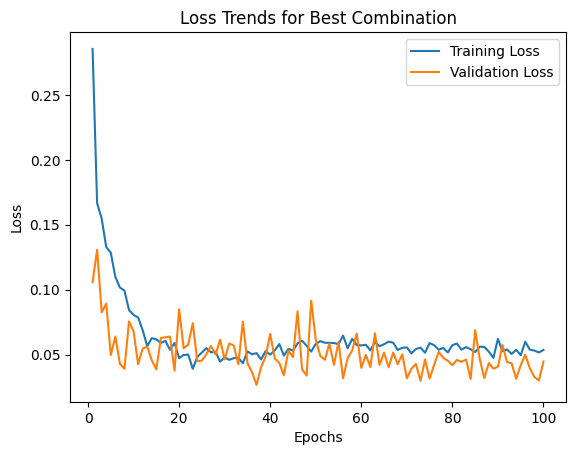

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation loss trends for the best model
if best_training_losses is not None and best_validation_losses is not None:
        epochs = range(1, len(best_training_losses) + 1)
        plt.plot(epochs, best_training_losses, label="Training Loss")
        plt.plot(epochs, best_validation_losses, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss Trends for Best Combination")
        plt.legend()
        plt.show()    
else:
    print("No valid hyperparameter combinations found.")

### Test the Best Model

In [15]:
# Test the best model with testing data
if best_model:
    best_seq_length = best_result['params']['sequence_length']  # Corrected key
    truncated_test_data = test_data[:, :best_seq_length, :]  # Adjusted slicing for 3D
    test_loss = best_model.evaluate(truncated_test_data, truncated_test_data)
    print(f"Test Loss with Best Hyperparameters: {test_loss}")

Test Loss with Best Hyperparameters: 0.03168078159341003


### Save the Best Model

In [16]:
import pickle

# Save the best model
if best_model:
    model_save_path = "rnn_model_for_arithmetic_sequence.pkl"
    with open(model_save_path, "wb") as f:
        pickle.dump(best_model, f)
    print(f"Best model saved to {model_save_path}")

Best model saved to rnn_model_for_arithmetic_sequence.pkl


### Load and Evaluate the Best Model

In [17]:
# Load and evaluate the saved model
with open("rnn_model_for_arithmetic_sequence.pkl", "rb") as f:
    best_rnn_model = pickle.load(f)
    loaded_test_loss = best_rnn_model.evaluate(truncated_test_data, truncated_test_data)
    print(f"Test Loss with Loaded Model: {loaded_test_loss}")

Test Loss with Loaded Model: 0.028092067088428457
